# August 30th, 2018
## Benjamin Adam Catching
## Polio-virus DIPs Project
## Andino Lab

Now that cells can be segmented and differentiated within the same droplet, condense the data from each cell into a dataframe with the the values cell_area, gfp_mean, gfp_std, and gfp_area.

In [7]:
# Import the important packages
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage
import scipy
import pandas as pd
import os
import sys
# Import the processing script
import microfluidics_analysis as ma

In [8]:
# Define the location of the files
bulk_cell_dir = '../../data/07.27_HeLa_TIP_Hong/'

# Define the six directories that contain image files
set_1 = '#1/10x-[0-9].tif'
set_2 = '#2/10x-[0-9].tif'
set_3 = '#3/10x-[0-9].tif'

# Read in the files
group_1 = sorted(glob.glob(bulk_cell_dir + set_1))
group_2 = sorted(glob.glob(bulk_cell_dir + set_2))
group_3 = sorted(glob.glob(bulk_cell_dir + set_3))

In [70]:
group_1_bright, group_1_gfp = ma.droplet_save(group_1)
group_2_bright, group_2_gfp = ma.droplet_save(group_2)
group_3_bright, group_3_gfp = ma.droplet_save(group_3)

print(len(group_1_bright))
print(len(group_2_bright))
print(len(group_3_bright))

477
413
407


In [13]:
group_1_segment = [ma.cell_segment_10x(x) for x in group_1_bright]
group_2_segment = [ma.cell_segment_10x(x) for x in group_2_bright]
group_3_segment = [ma.cell_segment_10x(x) for x in group_3_bright]

In [14]:
# Bring the previously determined droplets with cells values from yesterday
group_1_cell_numbers = np.array([4, 9, 10, 11, 24, 37, 38, 43, 45, 47, 49, 57, 72, 75, 86, 99, 
                                 111, 116, 117, 128, 135, 139, 145, 152, 155, 161, 167, 171, 174, 
                                 182, 184, 187, 203, 204, 212, 226, 231, 235, 236, 240, 266, 
                                 269, 270, 272, 277, 282, 286, 292, 294, 296, 301, 305, 306, 323, 
                                 325, 326, 332, 342, 345, 350, 351, 352, 356, 371, 385, 403, 404, 
                                 421, 427, 429, 432, 437, 441, 446, 447, 450, 461, 462, 473])

group_2_cell_numbers = np.array([0, 6, 20, 21, 32, 40, 44, 47, 50, 64, 67, 70, 75, 77, 98, 
                                 109, 118, 123, 133, 134, 138, 145, 149, 150, 152, 156, 159,
                                 162, 163, 165, 167, 170, 178, 191, 203, 207, 209, 210, 214,
                                 215, 225, 228, 229, 230, 233, 245, 246, 248, 250, 254, 264, 
                                 271, 291, 299, 305, 312, 331, 333, 335, 339, 340, 343, 354,
                                 357, 359, 365, 375, 376, 388, 390, 393, 395, 411])
group_3_cell_numbers = np.array([2, 4, 10, 11, 17, 21, 22, 26, 28, 40, 44, 49, 52, 53, 55, 62, 65,
                                 67, 71, 78, 84, 86, 87, 90, 91, 98, 100, 101, 103, 104, 107, 108,
                                 109, 115, 116, 119, 121, 130, 131, 132, 133, 152, 157, 160, 170, 
                                 171, 175, 176, 177, 185, 187, 197, 204, 205, 207, 208, 210, 213, 
                                 214, 215, 216, 217, 221, 226, 233, 235, 238, 246, 253, 256, 265, 
                                 266, 272, 278, 280, 285, 286, 287, 288, 292, 297, 302, 310, 311, 
                                 312, 314, 318, 319, 322, 325, 333, 334, 341, 344, 346, 353, 354, 
                                 357, 366, 372, 376, 380, 395, 402, 403, 404, 406])

In [15]:
# Get the threshold for the gfp for each group
group_1_gfp_vals = [[y for y in x.flatten() if y != 0] for x in group_1_gfp]
group_2_gfp_vals = [[y for y in x.flatten() if y != 0] for x in group_2_gfp]
group_3_gfp_vals = [[y for y in x.flatten() if y != 0] for x in group_3_gfp]

In [48]:
# Make the list of arrays into one array per group
group_1_gfp_values = []
for vals in group_1_gfp_vals:
    for x in vals:
        group_1_gfp_values.append(x)
group_1_gfp_values = np.array(group_1_gfp_values)

/Users/adam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


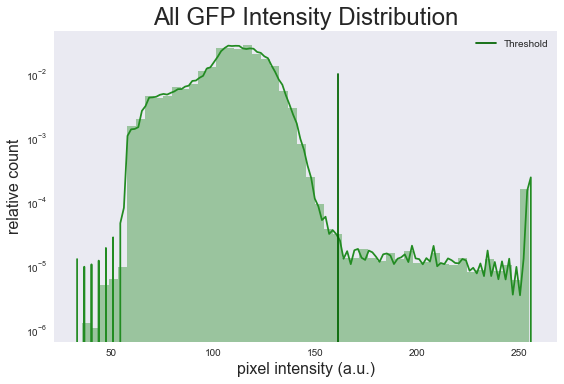

In [32]:
# Find the mean threshold
gfp_thresh = group_1_gfp_values.mean() + 3*group_1_gfp_values.std()
# Show the distribution of the GFP channel pixel intensities
with sns.axes_style('dark'):
    _ = sns.distplot(group_1_gfp_values, color='forestgreen')
    _ = plt.title('All GFP Intensity Distribution', size=24)
    _ = plt.ylabel('relative count', size=16)
    _ = plt.xlabel('pixel intensity (a.u.)', size=16)
    _ = plt.plot([gfp_thresh]*2, [0, 0.01], color='darkgreen', label='Threshold')
    _ = plt.legend()
    _ = plt.yscale('log')
    _ = plt.tight_layout()
    plt.show()
    

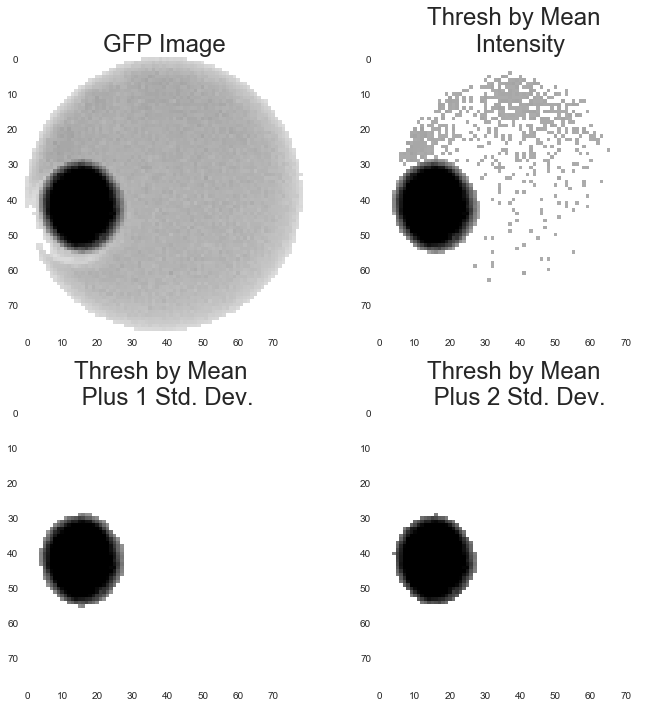

In [51]:
# Show the gfp channel with the various thresholds
test_gfp = group_1_gfp[212]
gfp_thresh_1 = group_1_gfp_values.mean()
gfp_thresh_2 = group_1_gfp_values.mean() + 1*group_1_gfp_values.std()
gfp_thresh_3 = group_1_gfp_values.mean() + 2*group_1_gfp_values.std()
with sns.axes_style('dark'):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    _ = ax[0, 0].imshow(test_gfp)
    _ = ax[0, 0].set_title('GFP Image', size=24)
    _ = ax[0, 1].imshow(test_gfp * (test_gfp > gfp_thresh_1))
    _ = ax[0, 1].set_title('Thresh by Mean \n Intensity', size=24)
    _ = ax[1, 0].imshow(test_gfp * (test_gfp > gfp_thresh_2))
    _ = ax[1, 0].set_title('Thresh by Mean \n Plus 1 Std. Dev.', size=24)
    _ = ax[1, 1].imshow(test_gfp * (test_gfp > gfp_thresh_3))
    _ = ax[1, 1].set_title('Thresh by Mean \n Plus 2 Std. Dev.', size=24)
    _ = plt.tight_layout()
    plt.show()

In [49]:
# Replicate for group 2
group_2_gfp_values = []
for vals in group_2_gfp_vals:
    for x in vals:
        group_2_gfp_values.append(x)
group_2_gfp_values = np.array(group_2_gfp_values)

/Users/adam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


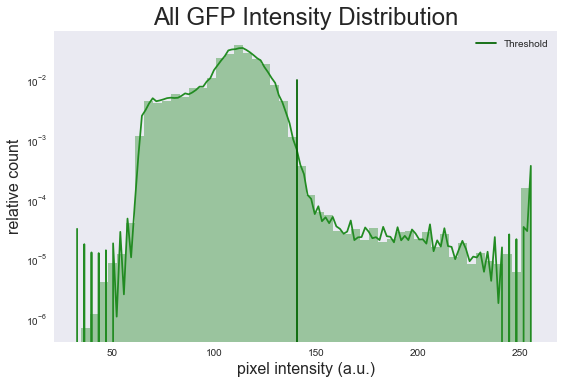

In [50]:
# Find the mean threshold
gfp_thresh = group_2_gfp_values.mean() + 2*group_2_gfp_values.std()
# Show the distribution of the GFP channel pixel intensities
with sns.axes_style('dark'):
    _ = sns.distplot(group_2_gfp_values, color='forestgreen')
    _ = plt.title('All GFP Intensity Distribution', size=24)
    _ = plt.ylabel('relative count', size=16)
    _ = plt.xlabel('pixel intensity (a.u.)', size=16)
    _ = plt.plot([gfp_thresh]*2, [0, 0.01], color='darkgreen', label='Threshold')
    _ = plt.legend()
    _ = plt.yscale('log')
    _ = plt.tight_layout()
    plt.show()

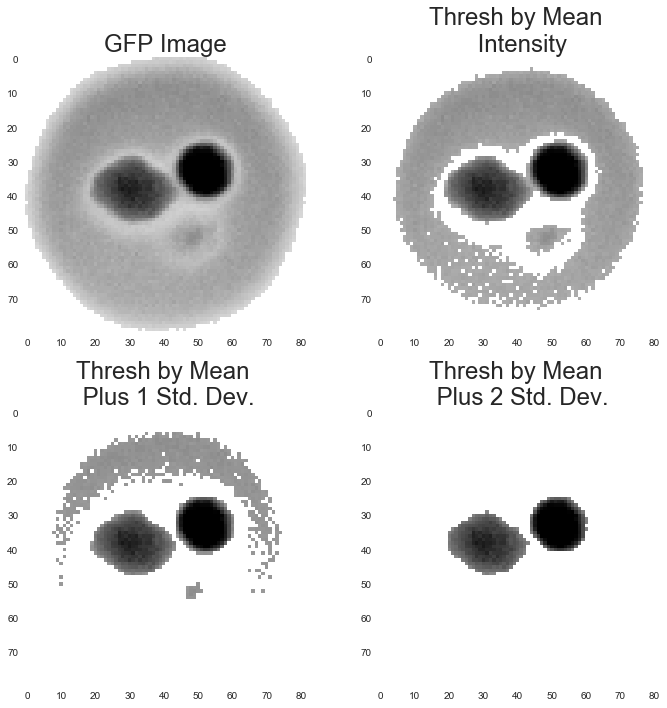

In [58]:
# Show the gfp channel with the various thresholds
test_gfp = group_2_gfp[149]
gfp_thresh_1 = group_2_gfp_values.mean()
gfp_thresh_2 = group_2_gfp_values.mean() + 1*group_2_gfp_values.std()
gfp_thresh_3 = group_2_gfp_values.mean() + 2*group_2_gfp_values.std()
with sns.axes_style('dark'):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    _ = ax[0, 0].imshow(test_gfp)
    _ = ax[0, 0].set_title('GFP Image', size=24)
    _ = ax[0, 1].imshow(test_gfp * (test_gfp > gfp_thresh_1))
    _ = ax[0, 1].set_title('Thresh by Mean \n Intensity', size=24)
    _ = ax[1, 0].imshow(test_gfp * (test_gfp > gfp_thresh_2))
    _ = ax[1, 0].set_title('Thresh by Mean \n Plus 1 Std. Dev.', size=24)
    _ = ax[1, 1].imshow(test_gfp * (test_gfp > gfp_thresh_3))
    _ = ax[1, 1].set_title('Thresh by Mean \n Plus 2 Std. Dev.', size=24)
    _ = plt.tight_layout()
    plt.show()

In [55]:
# Replicate for group 3
group_3_gfp_values = []
for vals in group_3_gfp_vals:
    for x in vals:
        group_3_gfp_values.append(x)
group_3_gfp_values = np.array(group_3_gfp_values)

/Users/adam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


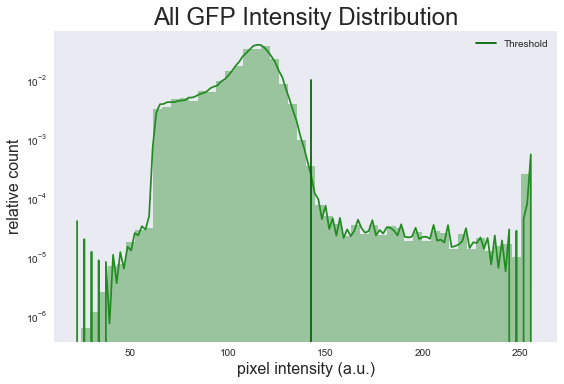

In [56]:
# Find the mean threshold
gfp_thresh = group_3_gfp_values.mean() + 2*group_3_gfp_values.std()
# Show the distribution of the GFP channel pixel intensities
with sns.axes_style('dark'):
    _ = sns.distplot(group_3_gfp_values, color='forestgreen')
    _ = plt.title('All GFP Intensity Distribution', size=24)
    _ = plt.ylabel('relative count', size=16)
    _ = plt.xlabel('pixel intensity (a.u.)', size=16)
    _ = plt.plot([gfp_thresh]*2, [0, 0.01], color='darkgreen', label='Threshold')
    _ = plt.legend()
    _ = plt.yscale('log')
    _ = plt.tight_layout()
    plt.show()

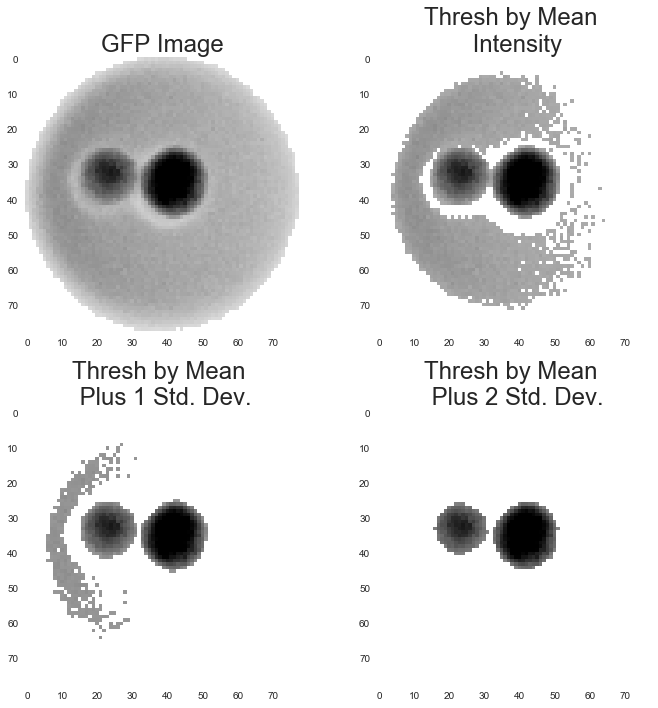

In [61]:
# Show the gfp channel with the various thresholds
test_gfp = group_3_gfp[217]
gfp_thresh_1 = group_3_gfp_values.mean()
gfp_thresh_2 = group_3_gfp_values.mean() + 1*group_3_gfp_values.std()
gfp_thresh_3 = group_3_gfp_values.mean() + 2*group_3_gfp_values.std()
with sns.axes_style('dark'):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    _ = ax[0, 0].imshow(test_gfp)
    _ = ax[0, 0].set_title('GFP Image', size=24)
    _ = ax[0, 1].imshow(test_gfp * (test_gfp > gfp_thresh_1))
    _ = ax[0, 1].set_title('Thresh by Mean \n Intensity', size=24)
    _ = ax[1, 0].imshow(test_gfp * (test_gfp > gfp_thresh_2))
    _ = ax[1, 0].set_title('Thresh by Mean \n Plus 1 Std. Dev.', size=24)
    _ = ax[1, 1].imshow(test_gfp * (test_gfp > gfp_thresh_3))
    _ = ax[1, 1].set_title('Thresh by Mean \n Plus 2 Std. Dev.', size=24)
    _ = plt.tight_layout()
    plt.show()

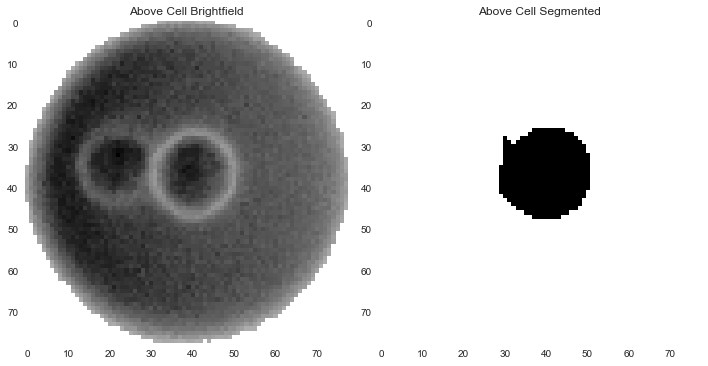

In [64]:
with sns.axes_style('dark'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    _ = ax[0].imshow(group_3_bright[217])
    _ = ax[0].set_title('Above Cell Brightfield')
    _ = ax[1].imshow(group_3_segment[217] == 2)
    _ = ax[1].set_title('Above Cell Segmented')
    _ = plt.tight_layout()
    plt.show()

In [113]:
group_1_data = []
for i, cell in enumerate(group_1_segment):
    # Number of cells
    num_cells = cell.max()
    if num_cells != 0:
        #print(i)
        gfp_image = group_1_gfp[i]
        # Threshold image
        gfp_thresh = group_1_gfp_values.mean() + 2*group_1_gfp_values.std()
        thresh_gfp_mask = gfp_image > gfp_thresh
        thresh_gfp_image = gfp_image * thresh_gfp_mask
        
        # Iterate over the cells
        for j in range(num_cells):
            # Define cell
            cell_mask = cell == (j+1)
            # Get cell area
            cell_area = cell.sum()
            # Get cell gfp channel
            cell_gfp = cell_mask * thresh_gfp_image
            # Get non-zero intensities
            if cell_gfp.flatten().max() == 0:
                cell_gfp_mean = 0
            else:
                cell_gfp_ints = np.array([x for x in cell_gfp.flatten() if x != 0])
                # Get cell gfp mean
                cell_gfp_mean = cell_gfp_ints.mean()
            # Get cell gfp std dev
            cell_gfp_std = cell_gfp_ints.std()
            # Get cell gfp area
            cell_gfp_area = (cell_mask * thresh_gfp_mask).sum()
            
            cell_data = [1, int(cell_area), float(cell_gfp_mean), float(cell_gfp_std), int(cell_gfp_area)]
            group_1_data.append(cell_data)
            
group_1_data = np.array(group_1_data)

In [117]:
group_1_df = pd.DataFrame(group_1_data, columns=['Group', 'Cell_Area', 'GFP_mean', 'GFP_std', 'GFP_area'])

In [121]:
group_2_data = []
for i, cell in enumerate(group_2_segment):
    # Number of cells
    num_cells = cell.max()
    if num_cells != 0:
        #print(i)
        gfp_image = group_2_gfp[i]
        # Threshold image
        gfp_thresh = group_2_gfp_values.mean() + 2*group_2_gfp_values.std()
        thresh_gfp_mask = gfp_image > gfp_thresh
        thresh_gfp_image = gfp_image * thresh_gfp_mask
        
        # Iterate over the cells
        for j in range(num_cells):
            # Define cell
            cell_mask = cell == (j+1)
            # Get cell area
            cell_area = cell.sum()
            # Get cell gfp channel
            cell_gfp = cell_mask * thresh_gfp_image
            # Get non-zero intensities
            if cell_gfp.flatten().max() == 0:
                cell_gfp_mean = 0
            else:
                cell_gfp_ints = np.array([x for x in cell_gfp.flatten() if x != 0])
                # Get cell gfp mean
                cell_gfp_mean = cell_gfp_ints.mean()
            # Get cell gfp std dev
            cell_gfp_std = cell_gfp_ints.std()
            # Get cell gfp area
            cell_gfp_area = (cell_mask * thresh_gfp_mask).sum()
            
            cell_data = [2, int(cell_area), float(cell_gfp_mean), float(cell_gfp_std), int(cell_gfp_area)]
            group_2_data.append(cell_data)
            
group_2_data = np.array(group_2_data)

In [122]:
group_2_df = pd.DataFrame(group_2_data, columns=['Group', 'Cell_Area', 'GFP_mean', 'GFP_std', 'GFP_area'])

In [126]:
group_3_data = []
for i, cell in enumerate(group_3_segment):
    # Number of cells
    num_cells = cell.max()
    if num_cells != 0:
        #print(i)
        gfp_image = group_3_gfp[i]
        # Threshold image
        gfp_thresh = group_3_gfp_values.mean() + 2*group_3_gfp_values.std()
        thresh_gfp_mask = gfp_image > gfp_thresh
        thresh_gfp_image = gfp_image * thresh_gfp_mask
        
        # Iterate over the cells
        for j in range(num_cells):
            # Define cell
            cell_mask = cell == (j+1)
            # Get cell area
            cell_area = cell.sum()
            # Get cell gfp channel
            cell_gfp = cell_mask * thresh_gfp_image
            # Get non-zero intensities
            if cell_gfp.flatten().max() == 0:
                cell_gfp_mean = 0
            else:
                cell_gfp_ints = np.array([x for x in cell_gfp.flatten() if x != 0])
                # Get cell gfp mean
                cell_gfp_mean = cell_gfp_ints.mean()
            # Get cell gfp std dev
            cell_gfp_std = cell_gfp_ints.std()
            # Get cell gfp area
            cell_gfp_area = (cell_mask * thresh_gfp_mask).sum()
            
            cell_data = [3, int(cell_area), float(cell_gfp_mean), float(cell_gfp_std), int(cell_gfp_area)]
            group_3_data.append(cell_data)
            
group_3_data = np.array(group_3_data)

In [127]:
group_3_df = pd.DataFrame(group_3_data, columns=['Group', 'Cell_Area', 'GFP_mean', 'GFP_std', 'GFP_area'])

In [133]:
dataframes = [group_1_df,group_2_df, group_3_df]
july_data = pd.concat(dataframes)

In [135]:
july_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 115
Data columns (total 5 columns):
Group        279 non-null float64
Cell_Area    279 non-null float64
GFP_mean     279 non-null float64
GFP_std      279 non-null float64
GFP_area     279 non-null float64
dtypes: float64(5)
memory usage: 13.1 KB


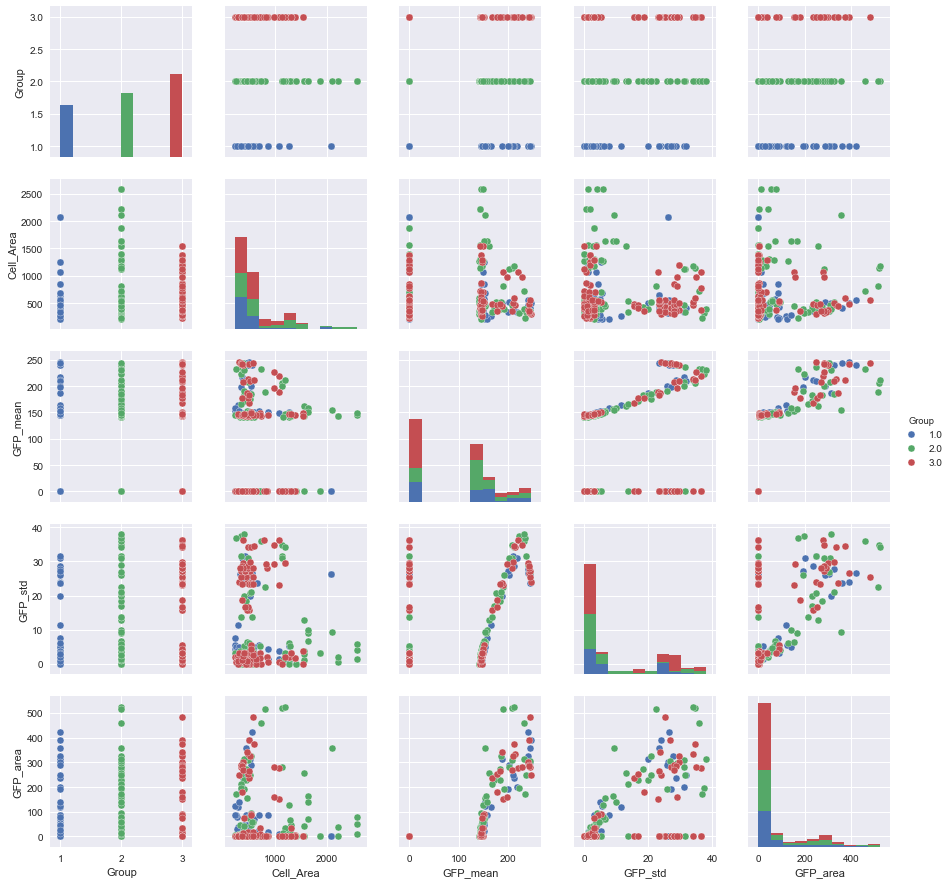

In [137]:
sns.pairplot(july_data, hue="Group")
plt.show()